<a href="https://colab.research.google.com/github/LEGENDRANGER-algorithum/project/blob/main/Explainable_Sleep_Disorder_Prediction_from_Lifestyle_and_Health_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML project

In [69]:
import pandas as pd
try:
    df_orginal = pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
    display(df_orginal)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [85]:


df=df_orginal;
print("Missing values per column (before):")
print(df.isnull().sum())

if df['Sleep Disorder'].isnull().sum() > 0:
    df['Sleep Disorder'] = df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0])

print("\nMissing values per column (after):")
print(df.isnull().sum())

Missing values per column (before):
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Missing values per column (after):
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [86]:
X = df.drop(columns=["Sleep Disorder", "Person ID"])
y = df["Sleep Disorder"]


In [87]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encode_cols = ["Occupation", "BMI Category", "Sleep Disorder", "Gender"]
le = LabelEncoder()
for col in encode_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded.head())

   Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0          1       1   27           9             6.1                 6   
1          2       1   28           1             6.2                 6   
2          3       1   28           1             6.2                 6   
3          4       1   28           6             5.9                 4   
4          5       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category Blood Pressure  \
0                       42             6             3         126/83   
1                       60             8             0         125/80   
2                       60             8             0         125/80   
3                       30             8             2         140/90   
4                       30             8             2         140/90   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77         4200               1  
1          75       

In [73]:
display(df);

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [74]:
sleep_disorder_column = df['Sleep Disorder']
display(sleep_disorder_column)

,Sleep Disorder
0,Sleep Apnea
1,Sleep Apnea
2,Sleep Apnea
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


In [88]:
X = df.drop(columns=["Sleep Disorder", "Person ID"])

y = df["Sleep Disorder"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print(y.value_counts())


Features shape: (374, 11)
Target shape: (374,)
Sleep Disorder
Sleep Apnea    297
Insomnia        77
Name: count, dtype: int64


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##model training and evulation

=== Gradient Boosting Classifier — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
 Sleep Apnea       0.98      0.97      0.97        60

    accuracy                           0.96        75
   macro avg       0.93      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



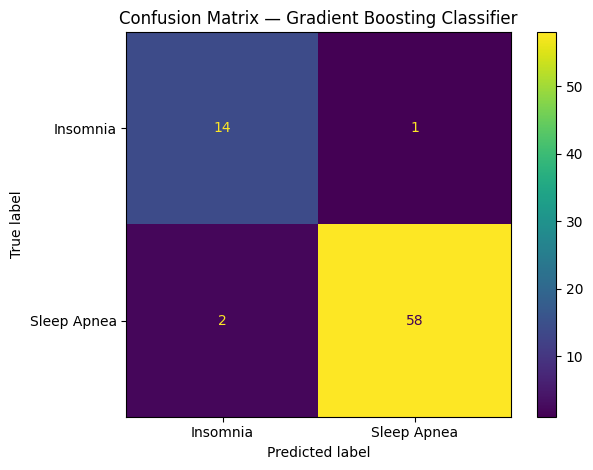


Top 15 features:
                              feature  importance
                 num__Sleep Duration    0.339313
            cat__BMI Category_Normal    0.228206
        num__Physical Activity Level    0.195179
                    num__Daily Steps    0.065098
                            num__Age    0.064348
          cat__Blood Pressure_142/92    0.022458
         cat__Occupation_Salesperson    0.018350
          cat__Blood Pressure_135/90    0.017475
          cat__Blood Pressure_128/84    0.009747
cat__Occupation_Sales Representative    0.005951
               num__Quality of Sleep    0.005062
                     num__Heart Rate    0.004902
          cat__Blood Pressure_130/85    0.004579
            cat__Occupation_Engineer    0.003884
          cat__Occupation_Accountant    0.003531


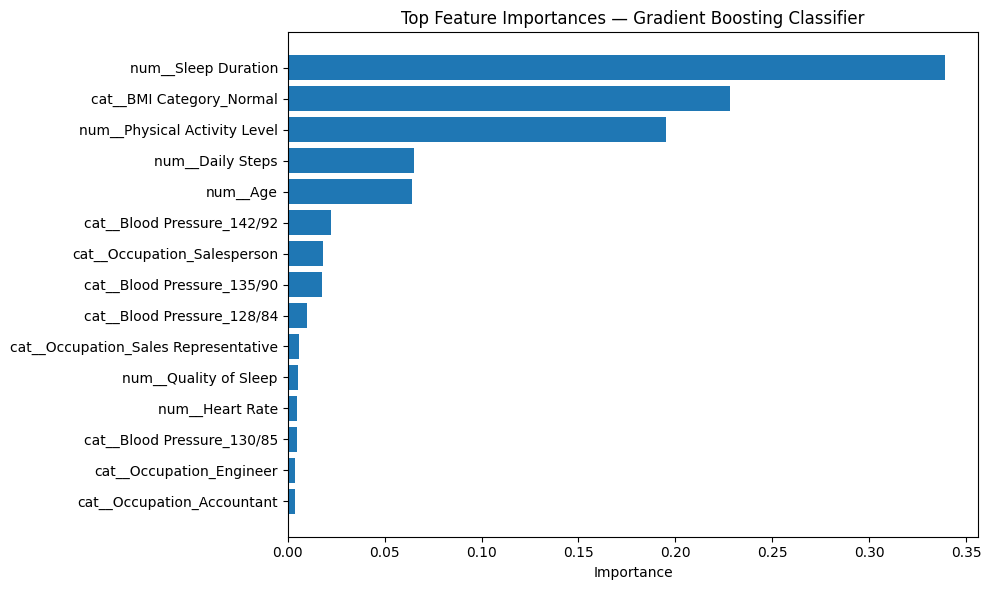


Saved model -> sleep_gbc_model.joblib


In [77]:
# === Imports ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt


X = df.drop(columns=["Sleep Disorder", "Person ID"])
y = df["Sleep Disorder"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

numeric_tf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc", StandardScaler())
])

categorical_tf = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("oh", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])


gbc = Pipeline([
    ("pre", preprocess),
    ("clf", GradientBoostingClassifier(n_estimators=200, random_state=42))
])

# === Train ===
gbc.fit(X_train, y_train)


y_pred = gbc.predict(X_test)
print("=== Gradient Boosting Classifier — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Gradient Boosting Classifier")
plt.tight_layout()
plt.show()

feature_importance = gbc.named_steps["clf"].feature_importances_

# Get transformed feature names directly from the fitted ColumnTransformer
all_feature_names = gbc.named_steps["pre"].get_feature_names_out()

# Build importance table
fi = pd.DataFrame({"feature": all_feature_names, "importance": feature_importance})
fi = fi.sort_values("importance", ascending=False)

# Show top 15 features
topk = 15 if len(fi) >= 15 else len(fi)
print(f"\nTop {topk} features:\n", fi.head(topk).to_string(index=False))

top_fi = fi.head(topk).iloc[::-1]
plt.figure(figsize=(10, 6))
plt.barh(top_fi["feature"], top_fi["importance"])
plt.xlabel("Importance")
plt.title("Top Feature Importances — Gradient Boosting Classifier")
plt.tight_layout()
plt.show()

joblib.dump(gbc, "sleep_gbc_model.joblib")
print("\nSaved model -> sleep_gbc_model.joblib")


In [90]:
import joblib, pandas as pd, numpy as np
model = joblib.load("sleep_gbc_model.joblib")

expected_cols = list(model.named_steps["pre"].get_feature_names_out())
print("Expected columns:\n", expected_cols)

new_data_raw = {
    "Gender": "Male",                 # string
    "Age": 35,
    "Occupation": "Software Engineer",# string
    "Sleep Duration": 6.2,
    "Quality of Sleep": 6,
    "Physical Activity Level": 42,
    "Stress Level": 6,
    "BMI Category": "Overweight",     # string
    "Systolic": 126,                # Added Systolic
    "Diastolic": 83,                 # Added Diastolic
    "Heart Rate": 77,
    "Daily Steps": 4200
}
new_df = pd.DataFrame([new_data_raw])
original_input_cols = model.named_steps["pre"].feature_names_in_

# Add any missing columns in new_df with NaN (shouldn't happen if new_data_raw is correct)
for col in original_input_cols:
    if col not in new_df.columns:
        new_df[col] = np.nan

# Reindex new_df to match the original input column order
new_df = new_df[original_input_cols]


# 5) প্রেডিক্ট
pred = model.predict(new_df)
print("Predicted Sleep Disorder:", pred[0])

Expected columns:
 ['num__Age', 'num__Sleep Duration', 'num__Quality of Sleep', 'num__Physical Activity Level', 'num__Stress Level', 'num__Heart Rate', 'num__Daily Steps', 'cat__Gender_Female', 'cat__Gender_Male', 'cat__Occupation_Accountant', 'cat__Occupation_Doctor', 'cat__Occupation_Engineer', 'cat__Occupation_Lawyer', 'cat__Occupation_Manager', 'cat__Occupation_Nurse', 'cat__Occupation_Sales Representative', 'cat__Occupation_Salesperson', 'cat__Occupation_Scientist', 'cat__Occupation_Software Engineer', 'cat__Occupation_Teacher', 'cat__BMI Category_Normal', 'cat__BMI Category_Normal Weight', 'cat__BMI Category_Obese', 'cat__BMI Category_Overweight', 'cat__Blood Pressure_115/75', 'cat__Blood Pressure_115/78', 'cat__Blood Pressure_117/76', 'cat__Blood Pressure_118/75', 'cat__Blood Pressure_119/77', 'cat__Blood Pressure_120/80', 'cat__Blood Pressure_122/80', 'cat__Blood Pressure_125/80', 'cat__Blood Pressure_125/82', 'cat__Blood Pressure_126/83', 'cat__Blood Pressure_128/84', 'cat__Bl

=== Random Forest — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.78      0.93      0.85        15
 Sleep Apnea       0.98      0.93      0.96        60

    accuracy                           0.93        75
   macro avg       0.88      0.93      0.90        75
weighted avg       0.94      0.93      0.94        75



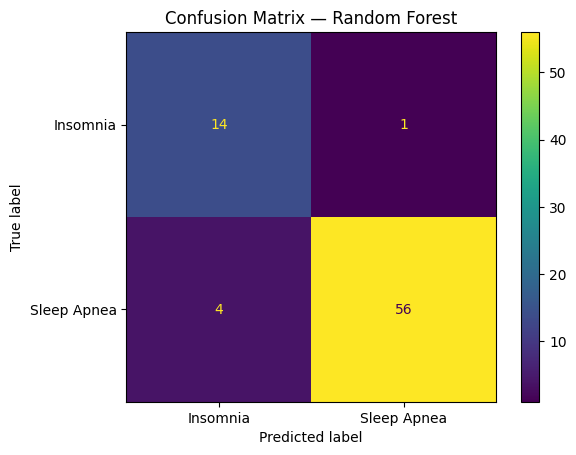


Top 15 features:
                 feature  importance
         Sleep Duration    0.178242
Physical Activity Level    0.114108
            Daily Steps    0.113434
                    Age    0.106975
    BMI Category_Normal    0.068993
BMI Category_Overweight    0.066442
       Quality of Sleep    0.044071
           Stress Level    0.040467
             Heart Rate    0.031512
  Blood Pressure_135/90    0.027896
 Occupation_Salesperson    0.027470
     Occupation_Teacher    0.023550
  Blood Pressure_130/85    0.022317
       Occupation_Nurse    0.015706
      Occupation_Doctor    0.014110

Saved model -> sleep_rf_model.joblib


In [79]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt


# Drop ID and target from features
X = df.drop(columns=["Sleep Disorder", "Person ID"])

# Target column
y = df["Sleep Disorder"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify numerical and categorical columns in the training data
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines for numerical and categorical features
numeric_tf = Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())])
categorical_tf = Pipeline([("imp", SimpleImputer(strategy="most_frequent")), ("oh", OneHotEncoder(handle_unknown="ignore"))])

# Combine preprocessing steps
preprocess = ColumnTransformer([("num", numeric_tf, num_cols), ("cat", categorical_tf, cat_cols)])

# Train model
rf = Pipeline([("pre", preprocess), ("clf", RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced_subsample"))])
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)
print("=== Random Forest — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Random Forest")
plt.show()

# Feature importance
try:
    ohe = rf.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]
    cat_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) else np.array([])
    feat_names = np.concatenate([np.array(num_cols), cat_names])
    importances = rf.named_steps["clf"].feature_importances_
    fi = pd.DataFrame({"feature": feat_names, "importance": importances})
    fi = fi.sort_values("importance", ascending=False).head(15)
    print("\nTop 15 features:\n", fi.to_string(index=False))
except Exception as e:
    print("Feature-importance listing skipped:", e)

joblib.dump(rf, "sleep_rf_model.joblib")
print("\nSaved model -> sleep_rf_model.joblib")

In [80]:

import joblib
joblib.dump(list(X.columns), "expected_columns.joblib")
expected_cols = joblib.load("expected_columns.joblib")


=== SVM — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.93      0.87      0.90        15
 Sleep Apnea       0.97      0.98      0.98        60

    accuracy                           0.96        75
   macro avg       0.95      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75



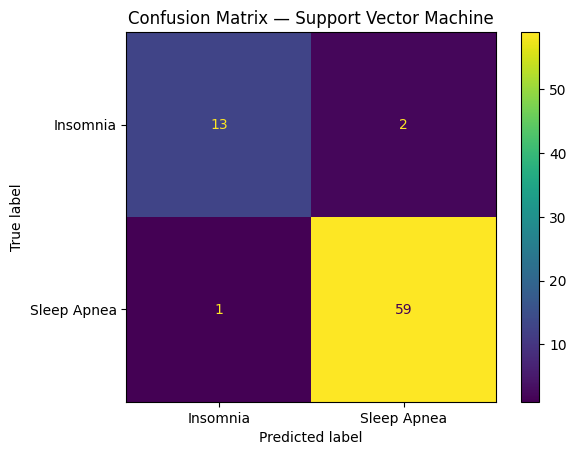

Feature-importance listing skipped: 'csr_matrix' object has no attribute 'flatten'

Saved model -> sleep_svm_model.joblib


In [81]:
# Import necessary libraries for SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt


num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipelines for numerical and categorical features
numeric_tf = Pipeline([("imp", SimpleImputer(strategy="median")), ("sc", StandardScaler())])
categorical_tf = Pipeline([("imp", SimpleImputer(strategy="most_frequent")), ("oh", OneHotEncoder(handle_unknown="ignore"))])

# Combine preprocessing steps
preprocess = ColumnTransformer([("num", numeric_tf, num_cols), ("cat", categorical_tf, cat_cols)])


svm = Pipeline([("pre", preprocess), ("clf", SVC(kernel="linear", random_state=42))])


svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)
print("=== SVM — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Support Vector Machine")
plt.show()

try:

    ohe = svm.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

    fitted_cat_cols = svm.named_steps['pre'].transformers_[1][2]
    cat_names = ohe.get_feature_names_out(fitted_cat_cols) if len(fitted_cat_cols) else np.array([])
    fitted_num_cols = svm.named_steps['pre'].transformers_[0][2]
    feat_names = np.concatenate([np.array(fitted_num_cols), cat_names])


    feature_importance = svm.named_steps["clf"].coef_.flatten()


    fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})

    fi['abs_importance'] = fi['importance'].abs()
    fi = fi.sort_values("abs_importance", ascending=False).head(15).drop(columns='abs_importance')


    print("\nTop 15 features (based on absolute coefficient values):\n", fi.to_string(index=False))
except Exception as e:
    print("Feature-importance listing skipped:", e)


joblib.dump(svm, "sleep_svm_model.joblib")
print("\nSaved model -> sleep_svm_model.joblib")

=== Gradient Boosting Classifier — Classification Report ===
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
 Sleep Apnea       0.98      0.97      0.97        60

    accuracy                           0.96        75
   macro avg       0.93      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



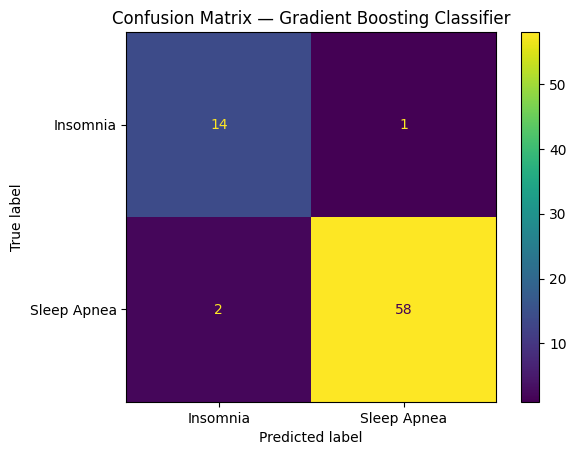


Top 15 features:
                         feature  importance
                 Sleep Duration    0.339313
            BMI Category_Normal    0.228206
        Physical Activity Level    0.195179
                    Daily Steps    0.065098
                            Age    0.064348
          Blood Pressure_142/92    0.022458
         Occupation_Salesperson    0.018350
          Blood Pressure_135/90    0.017475
          Blood Pressure_128/84    0.009747
Occupation_Sales Representative    0.005951
               Quality of Sleep    0.005062
                     Heart Rate    0.004902
          Blood Pressure_130/85    0.004579
            Occupation_Engineer    0.003884
          Occupation_Accountant    0.003531

Saved model -> sleep_gbc_model.joblib


In [82]:
# Train the model first
gbc.fit(X_train, y_train)


y_pred = gbc.predict(X_test)
print("=== Gradient Boosting Classifier — Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix — Gradient Boosting Classifier")
plt.show()


feature_importance = gbc.named_steps["clf"].feature_importances_


ohe = gbc.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

# Retrieve feature names for the categorical columns
cat_names = list(ohe.get_feature_names_out(cat_cols))


feat_names = np.concatenate([num_cols, cat_names])


fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
fi = fi.sort_values("importance", ascending=False).head(15)

print("\nTop 15 features:\n", fi.to_string(index=False))

# Save the model to a file
joblib.dump(gbc, "sleep_gbc_model.joblib")
print("\nSaved model -> sleep_gbc_model.joblib")


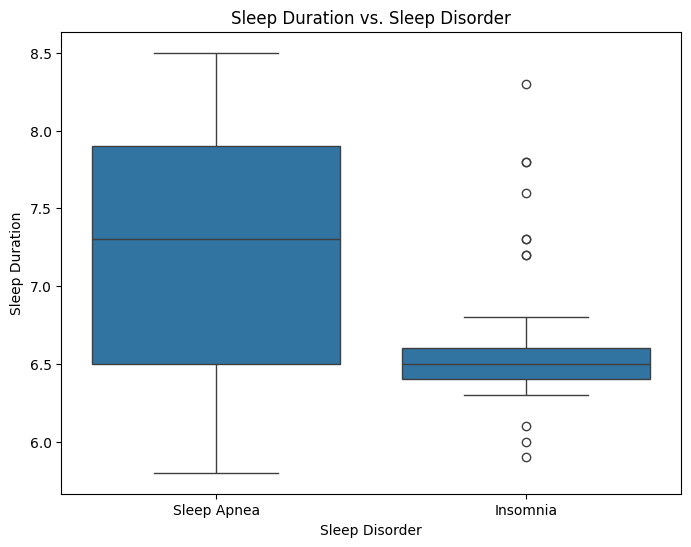

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of Sleep Duration vs. Sleep Disorder
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)
plt.title('Sleep Duration vs. Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')
plt.show()


Top 15 features:
                         feature  importance
                 Sleep Duration    0.339313
            BMI Category_Normal    0.228206
        Physical Activity Level    0.195179
                    Daily Steps    0.065098
                            Age    0.064348
          Blood Pressure_142/92    0.022458
         Occupation_Salesperson    0.018350
          Blood Pressure_135/90    0.017475
          Blood Pressure_128/84    0.009747
Occupation_Sales Representative    0.005951
               Quality of Sleep    0.005062
                     Heart Rate    0.004902
          Blood Pressure_130/85    0.004579
            Occupation_Engineer    0.003884
          Occupation_Accountant    0.003531


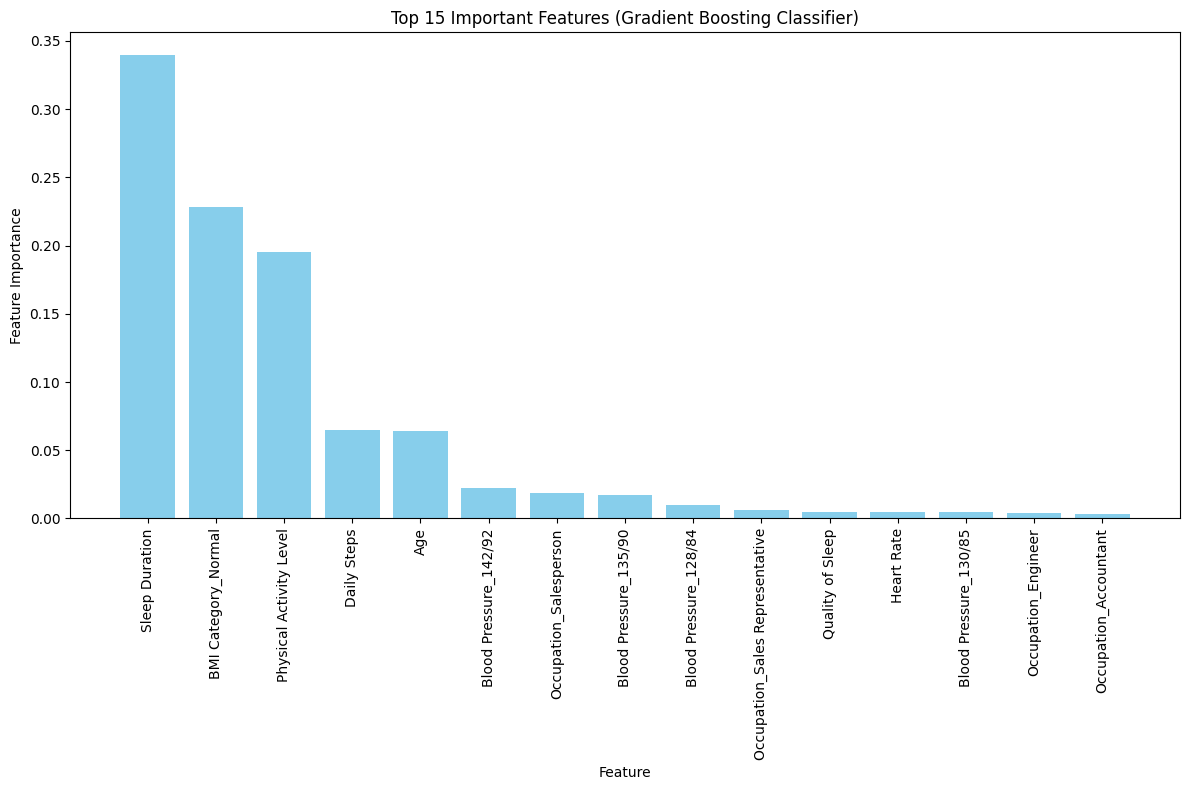

In [84]:
feature_importance = gbc.named_steps["clf"].feature_importances_

ohe = gbc.named_steps["pre"].named_transformers_["cat"].named_steps["oh"]

cat_names = list(ohe.get_feature_names_out(cat_cols))

feat_names = np.concatenate([num_cols, cat_names])
fi = pd.DataFrame({"feature": feat_names, "importance": feature_importance})
fi = fi.sort_values("importance", ascending=False).head(15)
print("\nTop 15 features:\n", fi.to_string(index=False))

plt.figure(figsize=(12, 8))
plt.bar(fi['feature'], fi['importance'], color='skyblue')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Top 15 Important Features (Gradient Boosting Classifier)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()